In [1]:
!pip install /kaggle/input/rsna-2022-whl/pylibjpeg-1.4.0-py3-none-any.whl
!pip install /kaggle/input/rsna-2022-whl/python_gdcm-3.0.15-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
!pip install /kaggle/input/dicomsdl-offline-installer/dicomsdl-0.109.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl

Processing /kaggle/input/rsna-2022-whl/pylibjpeg-1.4.0-py3-none-any.whl
Processing /kaggle/input/rsna-2022-whl/python_gdcm-3.0.15-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing /kaggle/input/dicomsdl-offline-installer/dicomsdl-0.109.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl


In [2]:
# Standard library imports
import os
import time

# Third-party library imports
import numpy as np
import pandas as pd
import cv2
import pydicom
import dicomsdl as dicom
import glob
import re

# Visualization library imports
import matplotlib.pyplot as plt

# Progress bar library imports
from tqdm.notebook import tqdm, trange

# Parallel processing library imports
from joblib import Parallel, delayed, cpu_count

from preprocess import MammoPreprocessorRSNA

%matplotlib inline

In [3]:
img_path = "/kaggle/input/rsna-breast-cancer-detection/train_images"

In [4]:
%%time
dst = MammoPreprocessorRSNA(img_path, image_size=(4096,2048), patch_size=(256,256))

CPU times: user 2.04 s, sys: 2.54 s, total: 4.58 s
Wall time: 54.8 s


In [5]:
i = np.random.randint(0, len(dst.images))
example = dst.images[i]
raw_img = dicom.open(example).pixelData()

In [6]:
dst.preprocess_image(example)

processed_img_path = glob.glob("/kaggle/working/RSNA/*/*.png")[0]
processed_img = cv2.imread(processed_img_path, 0)


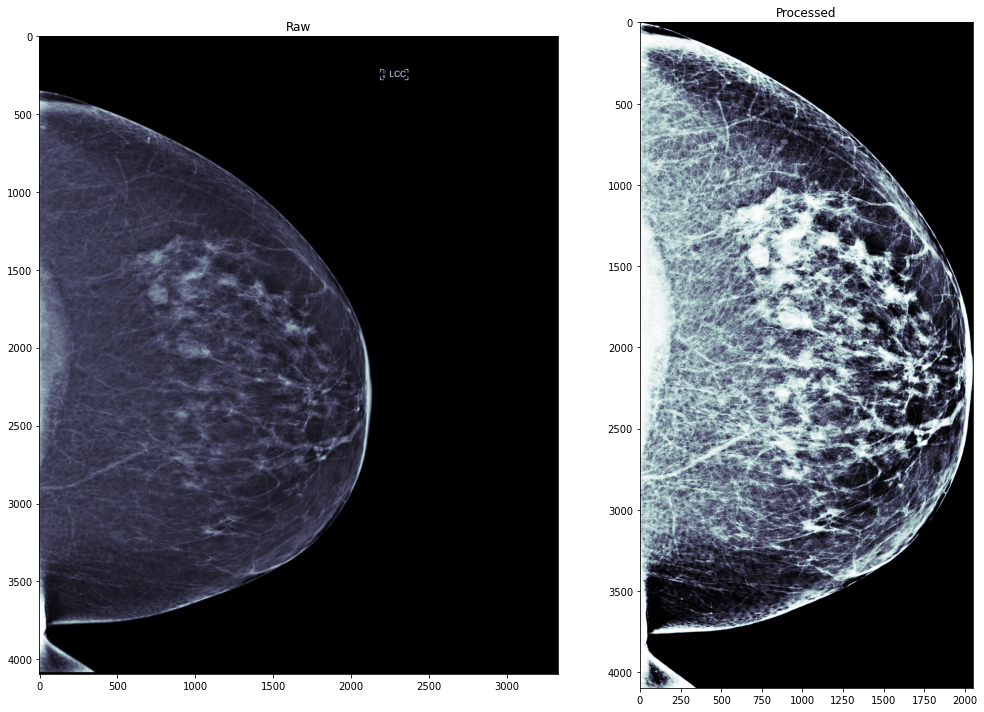

In [7]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

axs[0].imshow(raw_img, cmap="bone")
axs[0].set_title("Raw")

axs[1].imshow(processed_img, cmap="bone")
axs[1].set_title("Processed")

plt.tight_layout();

In [8]:
dst.images = sorted(dst.images)[:5000]

dst.preprocess_all("png")

  0%|          | 0/5000 [00:00<?, ?it/s]

Parallel preprocessing done!
